In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/Users/mariasoriano/Documents/tech_challenge/data-analytics-challenge/data/measurements.csv',sep=',',decimal=',')
data2 = pd.read_excel('/Users/mariasoriano/Documents/tech_challenge/data-analytics-challenge/data/measurements2.xlsx')

## 1. Data Cleaning and Exploration
- 1.1 Check nulls percent %
- 1.2 Split data Numerical / Categorical
- 1.3 Check Categorical unique values
- 1.4 Plot Distributions
- 1.5 Distinction between Numerical Continuous and Numerical Discrete

#### Checking Nulls percent in each column using the following function:

In [3]:
def nulls_percent (df):
    
    '''
    Shows percent of nulls in a data frame.
    
    Args:
        df: The dataframe we want to check out.
        
    Returns:
        A new df with 2columns:
        - 'column_name' with the name of the original df columns
        - 'nulls_percentage' with the percentage of nulls in every column
    '''
    nulls_percent = pd.DataFrame(df.isna().sum()/len(df)).reset_index()
    nulls_percent.columns = ['column_name', 'nulls_percentage']
    
    return nulls_percent

In [4]:
nulls_percent(data)

,column_name,nulls_percentage
0,distance,0.000000
1,consume,0.000000
2,speed,0.000000
3,temp_inside,0.030928
4,temp_outside,0.000000
5,specials,0.760309
6,gas_type,0.000000
7,AC,0.000000
8,rain,0.000000
9,sun,0.000000


In [5]:
# Will drop cols with +70% of Null values
data = data.drop(['specials', 'refill liters', 'refill gas'], axis=1)

In [6]:
data.dropna(subset=['temp_inside'], inplace=True)

In [7]:
data['temp_inside'].isnull().sum()

0

In [8]:
display(data.shape)
display(data.head())
display(data.info())

(376, 9)

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
0,28.0,5.0,26,21.5,12,E10,0,0,0
1,12.0,4.2,30,21.5,13,E10,0,0,0
2,11.2,5.5,38,21.5,15,E10,0,0,0
3,12.9,3.9,36,21.5,14,E10,0,0,0
4,18.5,4.5,46,21.5,15,E10,0,0,0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 376 entries, 0 to 387
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   distance      376 non-null    float64
 1   consume       376 non-null    float64
 2   speed         376 non-null    int64  
 3   temp_inside   376 non-null    float64
 4   temp_outside  376 non-null    int64  
 5   gas_type      376 non-null    object 
 6   AC            376 non-null    int64  
 7   rain          376 non-null    int64  
 8   sun           376 non-null    int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 29.4+ KB


None

In [9]:
data[['distance', 'consume', 'temp_inside']] = data[['distance', 'consume', 'temp_inside']].astype(float)

#### Split data: Numerical / Categorical

In [10]:
numerical = data.select_dtypes(["number"])
display(numerical.head())
display(numerical.shape)

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun
0,28.0,5.0,26,21.5,12,0,0,0
1,12.0,4.2,30,21.5,13,0,0,0
2,11.2,5.5,38,21.5,15,0,0,0
3,12.9,3.9,36,21.5,14,0,0,0
4,18.5,4.5,46,21.5,15,0,0,0


(376, 8)

In [11]:
categorical = data.select_dtypes(["object"])
display(categorical.head())
display(categorical.shape)

,gas_type
0,E10
1,E10
2,E10
3,E10
4,E10


(376, 1)

In [12]:
def get_unique_values (df):
    '''
    Get unique values for a whole DataFrame.
    
    Args:
        df: The df where we want to check out unique values in columns.
        
    Returns:
        An array with title of the col + list of unique values for each column in the given DataFrame.
    '''
    for col in list(df):
        print(col)
        print(df[col].unique())

In [13]:
get_unique_values(categorical)

gas_type
['E10' 'SP98']


#### 1.4 Checking distributions

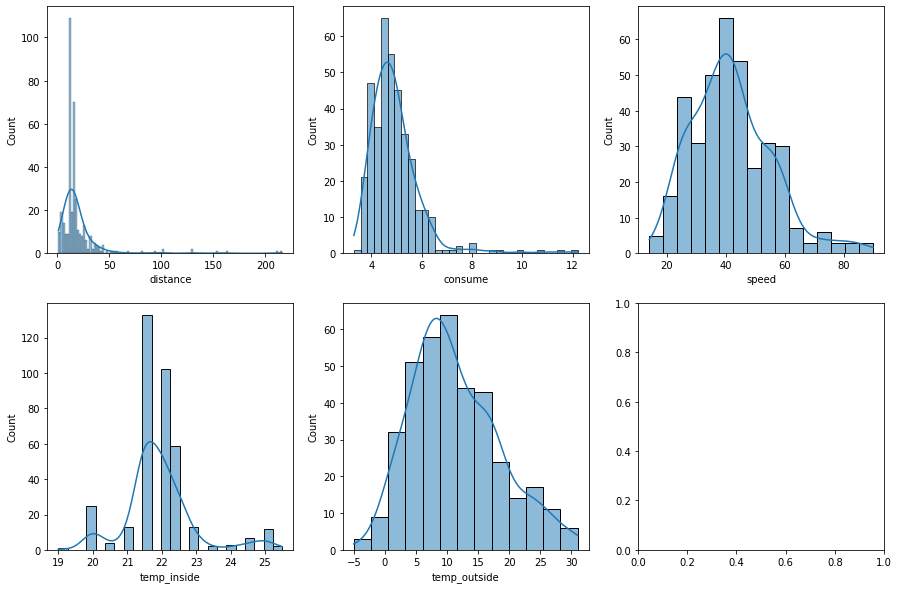

In [14]:
 fig, ax = plt.subplots(2,3, figsize=(15,10))

sns.histplot(data['distance'], kde=True, ax = ax[0,0]);
sns.histplot(data['consume'], kde=True, ax = ax[0,1]);
sns.histplot(data['speed'], kde=True, ax = ax[0,2]);
sns.histplot(data['temp_inside'], kde=True, ax = ax[1,0]);
sns.histplot(data['temp_outside'], kde=True, ax = ax[1,1]);
#sns.histplot(data['AC'], kde=True, ax = ax[1,0]); Discrete
#sns.histplot(data['rain'], kde=True, ax = ax[1,1]); Discrete
#sns.histplot(data['sun'], kde=True, ax = ax[1,2]); Discrete

#### 1.5 Distinction between numerical continuous and numerical discrete

In [15]:
discrete = numerical.filter(['AC', 'rain', 'sun'])
numerical = numerical.drop(['AC', 'rain', 'sun'], axis = 1)

#### 1.6 Checking for Outliers

In [16]:
def check_outliers(df):
    for col in df:
        sns.boxplot(x=col, data=df)
        plt.show()
# It gives a warning but using data = numerical[col] doesn't show as expected so I will keep the warnings this time

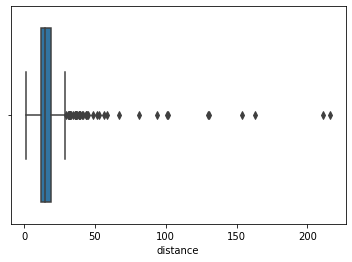

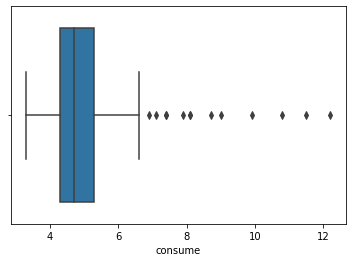

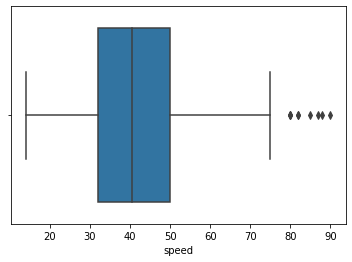

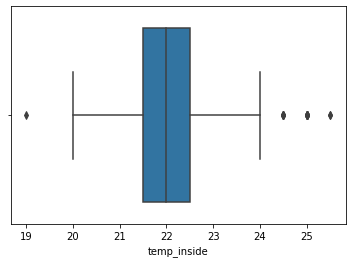

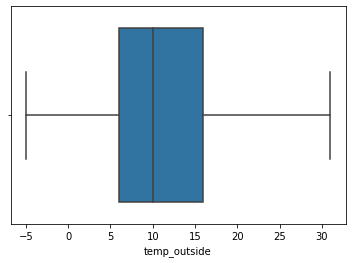

In [17]:
check_outliers(numerical)

##### IQR for Outliers

In [18]:
def remove_outliers_IQR(df, q1_value = 0.25, q3_value = 0.75):
    Q1=df.quantile(q1_value)
    Q3=df.quantile(q3_value)
    IQR=Q3-Q1
    df_final=df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]
    return df_final

In [19]:
remove_outliers_IQR(data)

/var/folders/6m/xnrf68g93dj9cnj3lwnc18b00000gn/T/ipykernel_14319/374202605.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_final=df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]


,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
0,28.0,5.0,26.0,21.5,12,E10,0.0,0.0,0.0
1,12.0,4.2,30.0,21.5,13,E10,0.0,0.0,0.0
2,11.2,5.5,38.0,21.5,15,E10,0.0,0.0,0.0
3,12.9,3.9,36.0,21.5,14,E10,0.0,0.0,0.0
4,18.5,4.5,46.0,21.5,15,E10,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39.0,NaN,18,SP98,0.0,0.0,0.0
384,16.1,4.3,38.0,NaN,31,SP98,NaN,0.0,0.0
385,16.0,3.8,45.0,NaN,19,SP98,0.0,0.0,0.0
386,15.4,4.6,42.0,NaN,31,SP98,NaN,0.0,0.0


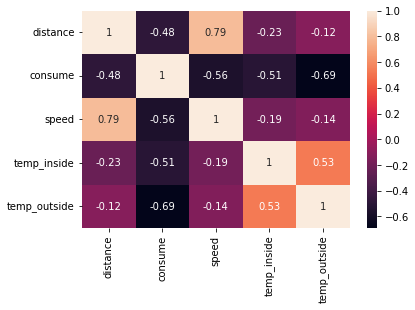

In [20]:
correlations_matrix = numerical.corr()
sns.heatmap(round(correlations_matrix.corr(), 2), annot=True)
plt.show()

# No correlations over 0.9

In [21]:
# Check shapes for a sec
display(numerical.shape)
display(categorical.shape)
display(discrete.shape)

(376, 5)

(376, 1)

(376, 3)

# Data Processing
- Distinction between numerical and categorical features.
- X-y Split
- Normalization of the numerical features
- Encoding categorical features
- Concat DataFrames

#### X-y Split

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y = numerical['consume']
X = numerical.drop(['consume'], axis=1)

#### Normalization of the Numerical Features
- Applying a MinMaxScaler

In [23]:
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler

transformer = MinMaxScaler().fit(X)
X_num_normalized = transformer.transform(X)
print(X_num_normalized.shape)

X_num_normalized = pd.DataFrame(X_num_normalized, columns=X.columns)
#X_num_normalized

(376, 4)


#### Encoding Categorical Features

In [24]:
from sklearn.preprocessing import OneHotEncoder

def hot_encoder(col):
    '''
    Encode categorical features.
    
    Args:
        col: The columns we want to encode/transform.
        
    Returns:
        A DataFrame containing the given columns encoded/transfomed.
    '''
    enc = OneHotEncoder(handle_unknown='ignore')
    enc.fit(col)
    onehotlabels = enc.transform(col).toarray()
    return pd.DataFrame(onehotlabels,columns = enc.categories_)

#### Concat DataFrames

In [25]:
gas_type_encoded = hot_encoder(categorical[['gas_type']])
#gas_type_encoded

data_encoded_concated = pd.concat([gas_type_encoded, discrete], axis=1)
data_encoded_concated

,"(E10,)","(SP98,)",AC,rain,sun
0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
383,NaN,NaN,0.0,0.0,0.0
384,NaN,NaN,1.0,0.0,0.0
385,NaN,NaN,0.0,0.0,0.0
386,NaN,NaN,1.0,0.0,0.0


## Applying a Linear Regression Model
- Train Test Split
- Applying Linear Regression

#### Train-test Split

In [34]:
X_complete = pd.concat([concat_clean, X_num_normalized], axis=1) 

In [44]:
from sklearn.model_selection import train_test_split

y = numerical['consume']
X = numerical.drop(['consume'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=100)

#### Applying Linear Regression

In [45]:
from sklearn import linear_model

lm = linear_model.LinearRegression()

lm.fit(X_train, y_train)

LinearRegression()

In [52]:
#y_pred = lm.predict(X)
#y_true = y_train
#print("The R2 is: ",r2_score(y_true, y_pred))
#print("The MSE is: ",mean_squared_error(y_true, y_pred, squared=True))
#print("The RMSE is: ",mean_squared_error(y_true, y_pred, squared=False))
#print("The MAE is: ",mean_absolute_error(y_true, y_pred))

## Model Validation
Error metrics:

- R2
- MSE
- RMSE
- MAE

In [47]:
# R2
print ('train R2: {} / test R2: {}'.format(lm.score(X_train, y_train),
                                            lm.score(X_test, y_test)))

train R2: 0.13319356832831886 / test R2: 0.12633345311499766


In [48]:
# MSE
from sklearn.metrics import mean_squared_error as MSE

train_mse=MSE(lm.predict(X_train), y_train)
test_mse=MSE(lm.predict(X_test), y_test)

print ('train MSE: {} / test MSE: {}'.format(train_mse, test_mse))

train MSE: 0.7955577249799911 / test MSE: 1.1829584831470437


In [49]:
# RMSE
print ('train RMSE: {} / test RMSE: {}'.format(train_mse**.5, test_mse**.5))

train RMSE: 0.8919404268111134 / test RMSE: 1.0876389488920686


In [50]:
# MAE
from sklearn.metrics import mean_absolute_error as MAE

train_mae=MAE(lm.predict(X_train), y_train)
test_mae=MAE(lm.predict(X_test), y_test)

print ('train MAE: {} / test MAE: {}'.format(train_mse, test_mse))

train MAE: 0.7955577249799911 / test MAE: 1.1829584831470437


In [ ]:
#sns.regplot(x= 'X', y= 'y', data=data);